## Taxi Trips Analysis Project
__________


In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## 1: Introduction

#### EDA

In [2]:
# load the dataset
df = pd.read_csv(r"C:\Users\pep\Documents\statistical_analysis_tools\Assessment2\Assessment 2 dataset\dataset\Main Sample.csv")

In [3]:
# show the first 5 rows of the dataframe
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [4]:
# show the shape of the dataframe - (rows, columns)
df.shape

(10906858, 19)

In [5]:
# show the data types of values in the columns
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
# is there any missing values? - no
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
# show some descriptive statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,10906858.0,1.535024,0.498772,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,10906858.0,1.670847,1.324891,0.000000,1.000000,1.000000,2.000000,9.000000e+00
trip_distance,10906858.0,4.648197,2981.095329,0.000000,1.000000,1.670000,3.080000,8.000010e+06
pickup_longitude,10906858.0,-72.818695,9.168964,-121.934288,-73.991508,-73.981377,-73.966103,0.000000e+00
pickup_latitude,10906858.0,40.114943,5.051022,0.000000,40.736301,40.753689,40.768082,6.090876e+01
RatecodeID,10906858.0,1.039350,0.518631,1.000000,1.000000,1.000000,1.000000,9.900000e+01
dropoff_longitude,10906858.0,-72.886591,8.900841,-121.933487,-73.991074,-73.979424,-73.961960,0.000000e+00
dropoff_latitude,10906858.0,40.153152,4.903456,0.000000,40.734806,40.754131,40.769619,6.090876e+01
payment_type,10906858.0,1.347536,0.491080,1.000000,1.000000,1.000000,2.000000,5.000000e+00
fare_amount,10906858.0,12.486929,35.564004,-957.600000,6.500000,9.000000,14.000000,1.112709e+05


#### Some numerical values are less than 0, which doesn't make sense. Let's find them

In [8]:
df[(df['tip_amount'] < 0) | (df['fare_amount'] < 0) | (df['extra'] < 0) | (df['mta_tax'] < 0) | (df['tolls_amount'] < 0) | (df['improvement_surcharge'] < 0) | (df['total_amount'] < 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1774,2,2016-01-02 00:50:32,2016-01-02 00:51:16,1,0.26,-73.825645,40.712231,1,N,-73.830330,40.714161,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
3492,2,2016-01-02 01:00:59,2016-01-02 01:01:26,1,0.05,-73.938538,40.803200,1,N,0.000000,0.000000,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
5105,2,2016-01-02 01:11:25,2016-01-02 01:14:30,1,0.53,-73.955864,40.772270,1,N,-73.951134,40.774231,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
5611,2,2016-01-02 01:14:29,2016-01-02 01:19:01,1,0.56,-73.991737,40.722214,1,N,-73.990044,40.728008,3,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-6.3
5666,2,2016-01-02 01:14:51,2016-01-02 01:16:23,2,0.04,-74.006111,40.739841,1,N,-74.005402,40.740799,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895616,2,2016-01-29 08:57:35,2016-01-29 08:59:31,1,0.58,-73.958801,40.772465,1,N,-73.956360,40.779888,4,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
10898624,2,2016-01-29 09:06:34,2016-01-29 09:06:53,1,0.00,-73.992401,40.715000,1,N,-73.991859,40.716042,4,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
10905279,2,2016-01-29 09:30:29,2016-01-29 09:36:22,1,0.64,-73.995811,40.759682,1,N,-73.988907,40.766491,4,-5.5,0.0,-0.5,0.0,0.0,-0.3,-6.3
10906542,2,2016-01-22 23:02:07,2016-01-22 23:02:44,1,0.19,-73.974091,40.788898,1,N,-73.970230,40.790630,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3


In [9]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

#### Let's check if each of the numerical variable is within the dataset description limits

__`Improvement_surcharge:`__`0.30 improvement surcharge assessed trips at the flag drop.`

So it should be either 0.30 or 0. Other values to be considered as mistake

In [10]:
df['improvement_surcharge'].value_counts()

 0.30    10901039
-0.30        4202
 0.00        1609
 0.10           5
 0.12           1
 0.16           1
 0.25           1
Name: improvement_surcharge, dtype: int64

__`MTA_tax:`__`0.50 MTA tax that is automatically triggered based on the metered rate in use.`

Should be either 0 or 0.5

In [11]:
df['mta_tax'].value_counts()

 0.50     10859581
 0.00        43201
-0.50         4062
 0.35            2
 0.89            1
 2.22            1
 2.45            1
 20.50           1
 36.44           1
 10.35           1
 3.00            1
 33.49           1
 17.45           1
 89.70           1
 43.41           1
 0.93            1
Name: mta_tax, dtype: int64

_________
__`Extra:`__`Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.`

Should be either 0.5, 1 or 0

In [12]:
df['extra'].value_counts()

 0.00      5710200
 0.50      3558725
 1.00      1635787
-0.50         1486
-1.00          513
 1.50           44
 0.02           25
 4.50           20
 2.00           12
 0.04           10
 0.20            6
 0.30            3
 2.50            3
 3.50            2
 0.70            2
 0.45            1
-32.69           1
-42.61           1
 0.80            1
 8.50            1
-16.65           1
 4.71            1
-0.45            1
 7.00            1
-4.50            1
 648.87          1
 4.10            1
-35.64           1
 5.00            1
 1.30            1
 0.10            1
 1.45            1
 31.80           1
-1.65            1
-0.20            1
Name: extra, dtype: int64

_______
__`Fare_amount:`__`The time-and-distance fare calculated by the meter.`

The fare can be different, but it can't be less than 0 or astronomicaly high

In [13]:
df['fare_amount'].sort_values()

4269251      -957.60
4334878      -434.00
2193262      -405.00
193432       -300.00
923034       -280.00
             ...    
4751459      3039.00
3856423      4001.15
3838692      5000.00
8499603      8008.00
7461456    111270.85
Name: fare_amount, Length: 10906858, dtype: float64

__`Total_amount`__`The total amount charged to passengers`

The same situation as with `fare_amount` 

In [14]:
df['total_amount'].sort_values()

4269251      -958.40
4334878      -440.34
2193262      -405.30
193432       -300.80
923034       -280.30
             ...    
4751459      3045.34
3856423      4002.05
3838692      5000.80
8499603      8008.80
7461456    111271.65
Name: total_amount, Length: 10906858, dtype: float64

__`Tolls_amount`__`Total amount of all tolls paid in trip.`

Can't be negative

In [15]:
df['tolls_amount'].sort_values()

110255      -17.40
884722      -17.12
7726868     -12.50
10459645    -12.50
639043      -12.50
             ...  
598602      882.22
5966724     885.59
3630019     900.10
992315      923.58
8548190     980.15
Name: tolls_amount, Length: 10906858, dtype: float64

__`Tip_amount`__`This field is automatically populated for credit card tips.`

Can't be negative

In [16]:
df['tip_amount'].sort_values()

10724554   -220.80
3614225     -70.00
7766456     -65.00
9649637     -62.00
10269801    -34.64
             ...  
8719432     550.00
5274108     800.00
180698      800.00
1617570     900.00
67897       998.14
Name: tip_amount, Length: 10906858, dtype: float64

__`Payment_type:`__`A numeric code signifying how the passenger paid for the trip.`

Should be:
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip



In [17]:
df.payment_type.value_counts()

1    7181476
2    3673651
3      38319
4      13411
5          1
Name: payment_type, dtype: int64

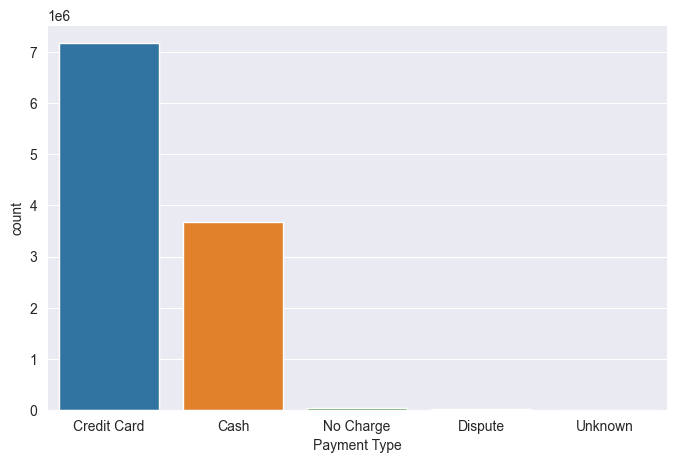

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_type')
plt.xticks(np.arange(5), ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown'])
plt.xlabel('Payment Type')
plt.show()

__`Pickup_longitude`__`Longitude where the meter was engaged.`

__`Pickup_latitude`__`Latitude where the meter was engaged.`

__`Dropoff_longitude`__`Longitude where the meter was disengaged.`

__`Dropoff_ latitude`__`Latitude where the meter was disengaged.`


Seems that there are 0 values in these columns, which means actually missing values or inproper geo location

In [19]:
# showing rows with any coordinate data equals to 0
df[(df['dropoff_longitude'] == 0) | (df['dropoff_latitude'] == 0) | (df['pickup_longitude'] == 0) | (df['pickup_latitude'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
38,1,2016-01-01 00:00:19,2016-01-01 00:19:33,1,3.40,0.000000,0.000000,1,N,0.0,0.0,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80
67,2,2016-01-01 00:00:41,2016-01-01 00:00:46,5,0.00,0.000000,0.000000,3,N,0.0,0.0,2,20.0,0.5,0.0,0.00,0.0,0.3,20.80
150,1,2016-01-01 00:01:34,2016-01-01 00:15:38,1,2.90,0.000000,0.000000,1,N,0.0,0.0,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
156,2,2016-01-01 00:01:36,2016-01-01 00:20:36,1,3.55,0.000000,0.000000,1,N,0.0,0.0,1,15.5,0.5,0.5,3.36,0.0,0.3,20.16
158,2,2016-01-01 00:01:37,2016-01-01 00:25:25,2,1.53,0.000000,0.000000,1,N,0.0,0.0,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906034,1,2016-01-29 09:32:48,2016-01-29 09:47:49,1,2.50,0.000000,0.000000,1,N,0.0,0.0,2,12.0,0.0,0.5,0.00,0.0,0.3,12.80
10906370,1,2016-01-29 09:33:58,2016-01-29 09:43:28,1,1.10,0.000000,0.000000,1,N,0.0,0.0,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30
10906404,1,2016-01-29 09:34:04,2016-01-29 09:44:03,1,0.60,0.000000,0.000000,1,N,0.0,0.0,1,7.5,0.0,0.5,2.07,0.0,0.3,10.37
10906760,2,2016-01-29 14:52:29,2016-01-29 14:53:29,2,0.00,-73.952721,40.584633,1,N,0.0,0.0,1,2.5,0.5,0.5,0.76,0.0,0.3,4.56


_________
__`Store_and_fwd_flag`__`Y = store and forward trip, N = not a store and forward trip`

Should be either __Y__ or __N__


In [20]:
df.store_and_fwd_flag.value_counts()

N    10843625
Y       63233
Name: store_and_fwd_flag, dtype: int64

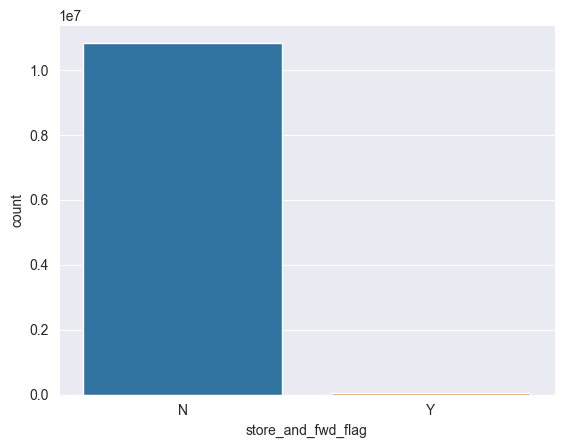

In [21]:
sns.countplot(data=df, x='store_and_fwd_flag');

________
__`RateCodeID`__`The final rate code in effect at the end of the trip.`
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

In [22]:
# What is 99 here?
df.RatecodeID.value_counts()

1     10626315
2       225019
5        33688
3        16822
4         4696
99         216
6          102
Name: RatecodeID, dtype: int64

__`Trip_distance`__`The elapsed trip distance in miles reported by the taximeter.`

If measured correctly it shouldn't be equal to 0 or astronomicaly high 

It can also be strange comparing to starting-ending time of the trip (1 hour long trip and 200 miles)

In [23]:
df.trip_distance.sort_values()

10906857          0.0
2047967           0.0
6059957           0.0
6059997           0.0
2047928           0.0
              ...    
1256517     1403240.5
2768776     1653402.0
8551614     2441418.8
2708971     4667468.7
1027151     8000010.0
Name: trip_distance, Length: 10906858, dtype: float64

In [24]:
df[df['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
67,2,2016-01-01 00:00:41,2016-01-01 00:00:46,5,0.0,0.000000,0.000000,3,N,0.000000,0.000000,2,20.0,0.5,0.0,0.00,0.00,0.3,20.80
232,1,2016-01-29 09:18:28,2016-01-29 09:18:34,1,0.0,-73.949928,40.772038,1,N,-73.949921,40.772034,3,2.5,0.0,0.5,0.00,0.00,0.3,3.30
336,2,2016-01-29 09:18:45,2016-01-29 09:18:47,1,0.0,0.000000,0.000000,2,N,0.000000,0.000000,1,52.0,0.0,0.5,8.00,0.00,0.3,60.80
425,2,2016-01-29 09:19:02,2016-01-29 09:19:06,1,0.0,-74.005180,40.706001,5,N,-74.005180,40.705986,2,65.0,0.0,0.5,0.00,0.00,0.3,65.80
448,1,2016-01-29 09:19:05,2016-01-29 09:19:05,1,0.0,-74.009949,40.703251,1,N,0.000000,0.000000,2,3.5,0.0,0.5,0.00,0.00,0.3,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906760,2,2016-01-29 14:52:29,2016-01-29 14:53:29,2,0.0,-73.952721,40.584633,1,N,0.000000,0.000000,1,2.5,0.5,0.5,0.76,0.00,0.3,4.56
10906764,2,2016-01-29 15:55:10,2016-01-29 15:55:45,5,0.0,0.000000,0.000000,1,N,0.000000,0.000000,1,2.5,0.5,0.5,0.76,0.00,0.3,4.56
10906779,2,2016-01-29 22:48:38,2016-01-29 22:48:47,1,0.0,-73.987198,40.718418,1,N,-73.987350,40.718460,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.0,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80


In [25]:
df[df['trip_distance'] > 1000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1027151,1,2016-01-04 14:56:45,2016-01-04 15:27:47,1,8000010.0,-73.998978,40.734444,1,N,-73.939156,40.843288,2,27.5,0.0,0.5,0.00,0.0,0.3,28.30
1046137,1,2016-01-04 17:12:01,2016-01-04 17:27:36,1,633008.3,-73.991150,40.739609,1,N,-73.992462,40.713997,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30
1256517,1,2016-01-05 22:51:22,2016-01-05 22:51:35,1,1403240.5,-73.945007,40.751808,1,N,-73.944992,40.751827,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
1256744,1,2016-01-05 22:53:29,2016-01-05 22:53:49,1,281060.3,-73.945023,40.751831,1,N,-73.945053,40.751842,3,2.5,0.0,0.5,0.00,0.0,0.3,3.30
2708971,1,2016-01-28 10:41:15,2016-01-28 11:03:53,1,4667468.7,-74.007156,40.734352,1,N,-74.007782,40.712494,1,14.5,0.0,0.5,3.06,0.0,0.3,18.36
2768776,1,2016-01-28 11:39:07,2016-01-28 11:41:29,2,1653402.0,-73.945663,40.751747,1,N,-73.945610,40.751617,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
8551614,1,2016-01-21 14:18:40,2016-01-21 14:27:53,4,2441418.8,-73.952095,40.824539,1,N,-73.948524,40.827324,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30


__`Passenger_count`__`The number of passengers in the vehicle. This is a driver-entered value.`

0 passengers considered as mistake

In [26]:
df['passenger_count'].value_counts()

1    7726984
2    1561977
5     601079
3     436431
6     369155
4     210641
0        520
8         26
9         23
7         22
Name: passenger_count, dtype: int64

__`VendorID`__`A code indicating the TPEP provider that provided the record.
1. Creative Mobile Technologies
2. VeriFone Inc.

In [27]:
df['VendorID'].value_counts()

2    5835429
1    5071429
Name: VendorID, dtype: int64

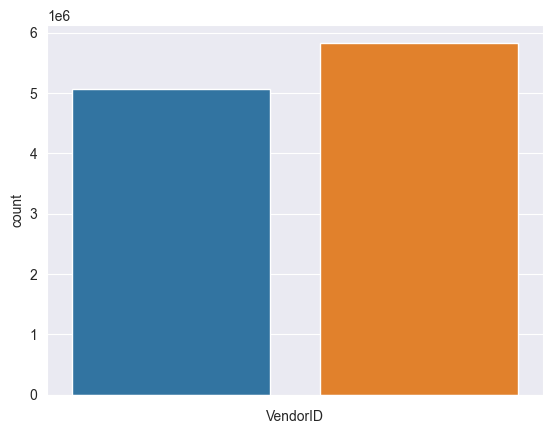

In [28]:
sns.countplot(data=df, x='VendorID');
plt.xticks([0,1], [])
plt.show()

In [29]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

## 2: Data Analysis

### Data Preprocessing

It looks that there are some incorrect values in the dataset, so it needs to be cleaned and preprocessed for further analysis.

There are several ways to deal with incorrect or missing values. One way, for example, is to impute or replace bad values by the most closely to truth.
However, in this case I decided to drop trips where we have totally wrong numberic values, because one improper value led to the final `total_amount` mistake and also because amog more that 10 mio trips we have just few rows with wrong data, so deleting them won't change the overall picture, but will definetely increase the accuracy of our analysis.

Steps to perform:
1. Change all money-related negative values to non-negative by taking their absolute values
3. Remove trips where `improvement_surcharge` is not equal to 0.3 or 0
4. Remove trips where `mta_tax` is not equal to 0 or .5
5. Remove trips where `extra` is not equal to .5, 1 or 0
6. Remove extremely high `Fare_amount` and `total_amount`
7. Replace '99' in `RateCodeID` with the most frequently observed `1`
8. Remove rows with extremely high values of `Tip_amount`, `Tolls_amount`, `fare_amount` and `Total_amount`
9. Convert date columns to datetime format

#### Negative to non-negative

In [30]:
data = df.copy()
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [31]:
# take columns with money-related numerical values
data.columns[-7:] 

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [32]:
# show how much negative values we have there
(data.loc[:, data.columns[-7:]] < 0).sum()

fare_amount              4216
extra                    2007
mta_tax                  4062
tip_amount                128
tolls_amount               24
improvement_surcharge    4202
total_amount             4217
dtype: int64

In [33]:
# take the absolute value of all our money-related values
data.loc[:, data.columns[-7:]] = data.loc[:, data.columns[-7:]].abs()

In [34]:
# now we don't have negatives
(data.loc[:, data.columns[-7:]] < 0).sum()

fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

#### Remove trips with wrong `extra`, `mta_tax` and `improvement_surcharge` data

In [35]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [36]:
# there are only 159 rows with incorrect money values, so delete them
data[(~data['improvement_surcharge'].isin([.3, 0])) |
     (~data['mta_tax'].isin([.5, 0])) |
     (~data['extra'].isin([.5, 1, 0]))].shape[0]

159

In [37]:
# drop the rows with bad values
data.drop(data[(~data['improvement_surcharge'].isin([.3, 0])) |
               (~data['mta_tax'].isin([.5, 0])) |
               (~data['extra'].isin([.5, 1, 0]))].index, inplace=True)

In [38]:
# check that we deleted only 159 rows
df.shape[0] - data.shape[0]

159

#### Replace '99' in `RateCodeID` to '1'

In [39]:
# number of rows where 'RatecodeID' is 99 before 
data[data['RatecodeID'] == 99].shape[0]

214

In [40]:
# replacing '99' with '1', keeping other untouched 
data['RatecodeID'] = np.where(data['RatecodeID'] == 99, 1, data['RatecodeID'])

In [41]:
# number of rows where 'RatecodeID' is 99 after
data[data['RatecodeID'] == 99].shape[0]

0

#### Dealing with `Tip_amount`, `Tolls_amount`, `fare_amount` and `Total_amount`

We have some outlier values in these columns. However, we don't know if all of them wrong or not.

I would propose to keep all of the high values, except top 2 of `total_amount` and `fare_amount`, for __Talk A__.

For __Task B__ we'll probably remove the outliers in order to increase the model accuracy.

In [42]:
data[['tip_amount', 'tolls_amount', 'fare_amount', 'total_amount']].describe(percentiles=[.5, .75, .9999]).T

,count,mean,std,min,50%,75%,99.99%,max
tip_amount,10906699.0,1.750782,2.623411,0.0,1.26,2.32,50.000000,998.14
tolls_amount,10906699.0,0.293374,1.694555,0.0,0.00,0.00,21.800000,980.15
fare_amount,10906699.0,12.493146,35.446353,0.0,9.00,14.00,190.000000,111270.85
total_amount,10906699.0,15.648501,36.296233,0.0,11.62,17.16,215.109812,111271.65


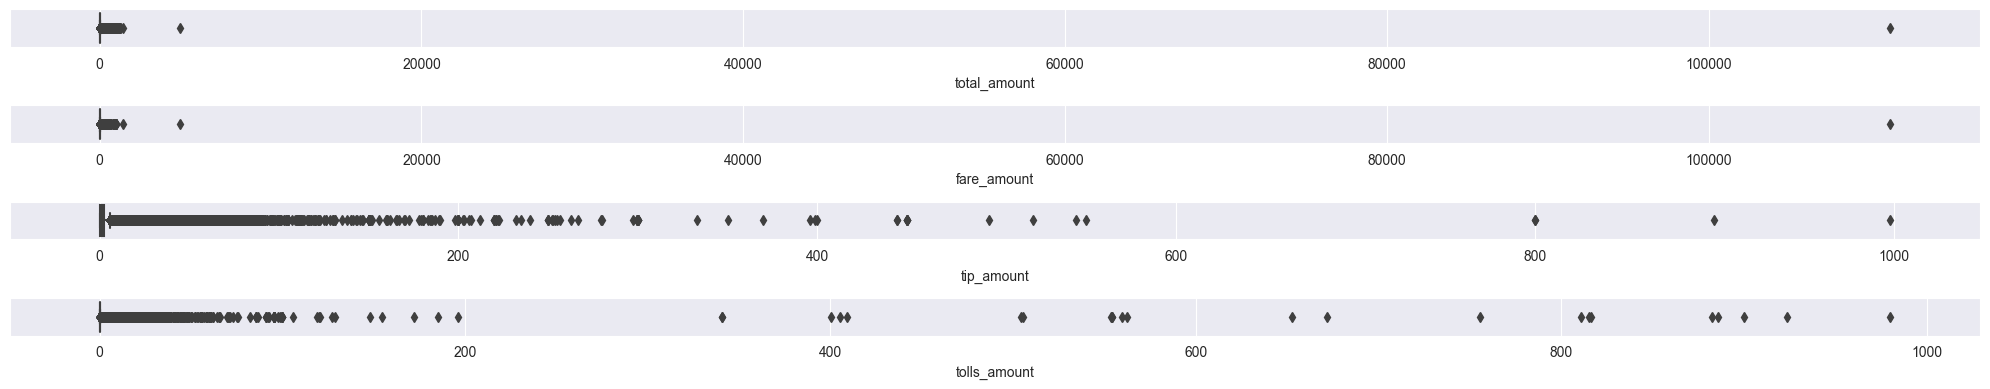

In [43]:
fig, axs = plt.subplots(4, 1, figsize=(20, 4))
sns.boxplot(data=data, x='total_amount', ax=axs[0])
sns.boxplot(data=data, x='fare_amount', ax=axs[1])
sns.boxplot(data=data, x='tip_amount', ax=axs[2])
sns.boxplot(data=data, x='tolls_amount', ax=axs[3])
plt.tight_layout()
plt.show()

In [44]:
# what are those 2 highest values of fare_amount?
top2fare = data['fare_amount'].sort_values(ascending=False).head(2)
top2fare

7461456    111270.85
3838692      5000.00
Name: fare_amount, dtype: float64

In [45]:
# what are those 2 highest values of total_amount?
top2total = data['total_amount'].sort_values(ascending=False).head(2)
top2total

7461456    111271.65
3838692      5000.80
Name: total_amount, dtype: float64

In [46]:
data[data['fare_amount'].isin(top2fare.tolist())]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
3838692,1,2016-01-25 16:32:07,2016-01-25 16:32:12,1,0.0,-73.981445,40.684433,6,N,-73.981308,40.684326,2,5000.00,0.0,0.5,0.0,0.0,0.3,5000.80
7461456,1,2016-01-30 14:41:23,2016-01-30 14:48:55,1,0.9,-73.991638,40.754616,1,N,-73.980461,40.763241,2,111270.85,0.0,0.5,0.0,0.0,0.3,111271.65


In [47]:
data[data['total_amount'].isin(top2total.tolist())]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
3838692,1,2016-01-25 16:32:07,2016-01-25 16:32:12,1,0.0,-73.981445,40.684433,6,N,-73.981308,40.684326,2,5000.00,0.0,0.5,0.0,0.0,0.3,5000.80
7461456,1,2016-01-30 14:41:23,2016-01-30 14:48:55,1,0.9,-73.991638,40.754616,1,N,-73.980461,40.763241,2,111270.85,0.0,0.5,0.0,0.0,0.3,111271.65


Let's remove from our dataframe these two trips

In [48]:
data.shape

(10906699, 19)

In [49]:
# removing top 2 values of total_amount and fare_amount
data.drop(data[data['fare_amount'].isin(top2fare.tolist())].index, inplace=True)

In [50]:
data.shape

(10906697, 19)

#### Convert date columns to datetime format

In [51]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [52]:
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task A

For this task we'll need to work with datetime and total amount data from the preprocessed dataset.

A target datetime column will be `tpep_pickup_datetime`. I will calculate daily and hourly trends based on the time of the taxi trip start.

Also, I will create temporary additional columns to answer the questions.

In [53]:
# take only 2 needed columns from the cleaned dataset
data_1 = data[['tpep_pickup_datetime', 'total_amount']].copy()

In [54]:
# create additional columns for Task A.ii and Task A.iii
# morning: 06:00 - 11:59
# afternoon: 12:00-17:59
# evening: 18:00-23:59
# night: 00:00-05:59
data_1['day_time'] = 'NA'
data_1['day_time'] = np.where(data_1['tpep_pickup_datetime'].dt.hour.isin(np.arange(6, 12, 1)), 'morning', data_1['day_time'])
data_1['day_time'] = np.where(data_1['tpep_pickup_datetime'].dt.hour.isin(np.arange(12, 18, 1)), 'afternoon', data_1['day_time'])
data_1['day_time'] = np.where(data_1['tpep_pickup_datetime'].dt.hour.isin(np.arange(18, 24, 1)), 'evening', data_1['day_time'])
data_1['day_time'] = np.where(data_1['tpep_pickup_datetime'].dt.hour.isin(np.arange(0, 6, 1)), 'night', data_1['day_time'])

# day names
data_1['day_name'] = data_1['tpep_pickup_datetime'].dt.day_name()

data_1

,tpep_pickup_datetime,total_amount,day_time,day_name
0,2016-01-01 00:00:00,8.80,night,Friday
1,2016-01-01 00:00:00,19.30,night,Friday
2,2016-01-01 00:00:00,34.30,night,Friday
3,2016-01-01 00:00:00,17.30,night,Friday
4,2016-01-01 00:00:00,8.80,night,Friday
...,...,...,...,...
10906853,2016-01-31 23:30:32,9.80,evening,Sunday
10906854,2016-01-05 00:15:55,3.80,night,Tuesday
10906855,2016-01-05 06:12:46,8.80,morning,Tuesday
10906856,2016-01-05 06:21:44,14.75,morning,Tuesday


#### Task A.i

What is the average demand for the taxis in the days of the week (i.e., daily trend). Which of the days has the highest and which lowest demand?

In [55]:
daily_demand = data_1[['tpep_pickup_datetime']].groupby(data_1['tpep_pickup_datetime'].dt.weekday).count().rename(columns={'tpep_pickup_datetime':'avg_demand'})
daily_demand.index.rename('weekday', inplace=True)
daily_demand['avg_demand'] = daily_demand['avg_demand']/data.shape[0]
daily_demand

,avg_demand
weekday,
0,0.117576
1,0.130512
2,0.136143
3,0.141594
4,0.180859
5,0.150737
6,0.142580


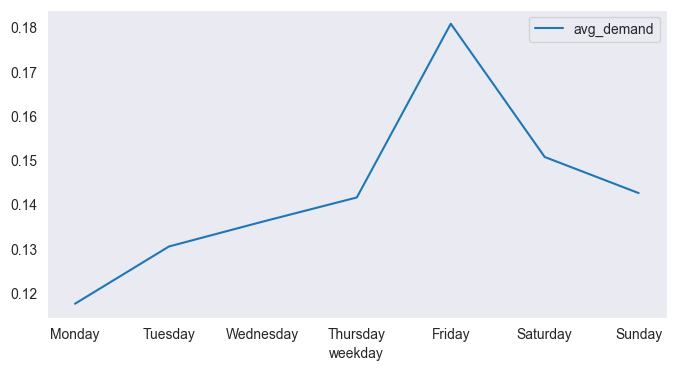

In [56]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=daily_demand)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()
plt.show()

Top demand day is Friday

#### Task A.ii

Which time of the day (morning, afternoon, evening, and night) is likely be a peak period for the taxi’s operation from the data?

In [57]:
hourly_demand = data_1.groupby(data_1['day_time']).tpep_pickup_datetime.count().to_frame()
hourly_demand = hourly_demand.rename(columns={'tpep_pickup_datetime':'demand'})
hourly_demand

,demand
day_time,
afternoon,3296961
evening,3670543
morning,2607360
night,1331833


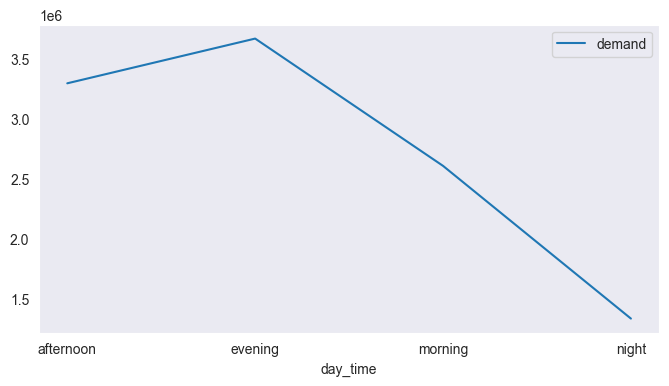

In [58]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=hourly_demand)
plt.grid()
plt.show()

Evening is the peak part of the day in terms of taxi demand 

#### Task A.iii

On average, how much revenue was generated in the weekdays and weekends for the business for the period covered in the dataset?

In [59]:
data_1['working_weekend'] = np.where(data_1.tpep_pickup_datetime.dt.weekday.isin(np.arange(5)), 'weekday', 'weekend')

In [60]:
data_1.working_weekend.value_counts()

weekday    7707582
weekend    3199115
Name: working_weekend, dtype: int64

In [61]:
data_1.groupby('working_weekend').mean().rename(columns={'total_amount':'average_revenue'})

C:\Users\pep\AppData\Local\Temp\ipykernel_13004\1975323203.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_1.groupby('working_weekend').mean().rename(columns={'total_amount':'average_revenue'})


,average_revenue
working_weekend,
weekday,15.866139
weekend,15.087812


In [62]:
data_1.groupby('day_name').mean().rename(columns={'total_amount':'average_revenue'})

C:\Users\pep\AppData\Local\Temp\ipykernel_13004\3273309670.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_1.groupby('day_name').mean().rename(columns={'total_amount':'average_revenue'})


,average_revenue
day_name,
Friday,15.671595
Monday,16.037919
Saturday,14.748544
Sunday,15.446491
Thursday,15.953231
Tuesday,15.997315
Wednesday,15.759897


C:\Users\pep\AppData\Local\Temp\ipykernel_13004\1466975609.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_1, x='working_weekend', y='total_amount', ci=None);


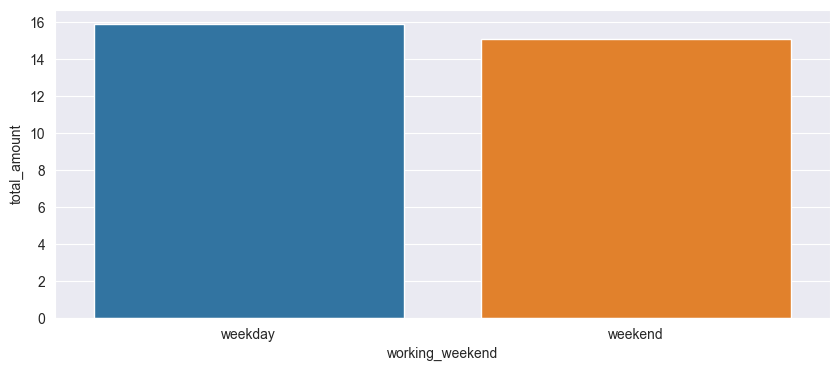

In [63]:
# plot the average revenue for two groups of days - weekdays and weekends
plt.figure(figsize=(10, 4))
sns.barplot(data=data_1, x='working_weekend', y='total_amount', ci=None);

In [64]:
data_1.groupby('day_name').mean()

C:\Users\pep\AppData\Local\Temp\ipykernel_13004\1104187682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_1.groupby('day_name').mean()


,total_amount
day_name,
Friday,15.671595
Monday,16.037919
Saturday,14.748544
Sunday,15.446491
Thursday,15.953231
Tuesday,15.997315
Wednesday,15.759897


C:\Users\pep\AppData\Local\Temp\ipykernel_13004\373216722.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_1, x='day_name', y='total_amount', ci=None);


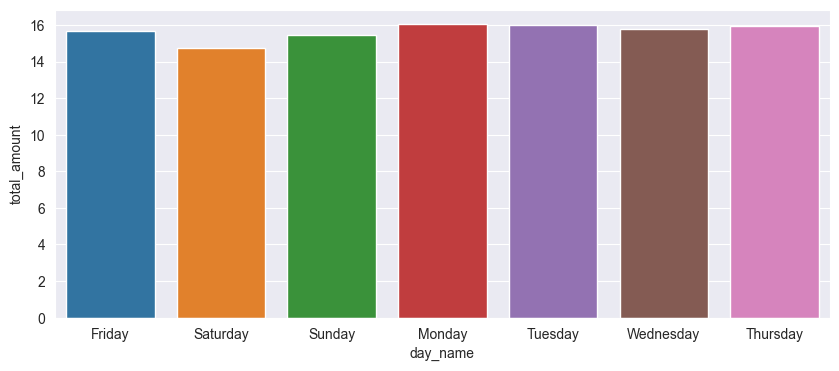

In [65]:
# plot the average revenue for day name 
plt.figure(figsize=(10, 4))
sns.barplot(data=data_1, x='day_name', y='total_amount', ci=None);

## 3: Regression Analysis

### Task B

First of all, in order to have max accurate prediction model I will remove all outliers from the data. Those values are not necessarily the mistakes. That's why I didn't remove them before analyzing weekly/daily patterns. But those outliers can badly influence on the prediction model performance, so I remove them now.

1. `passenger_count` - Number of passengers. 7,8,9 are rare enough to not count them. 0 passengers is meaningless.

In [66]:
data.passenger_count.value_counts()

1    7726841
2    1561964
5     601079
3     436428
6     369155
4     210640
0        519
8         26
9         23
7         22
Name: passenger_count, dtype: int64

In [67]:
# keep only the trips with 1 t o 6 passengers
data_b = data[data['passenger_count'].isin([1, 2, 3, 4, 5, 6])]

2. `Fare_amount` - seems to be the most influencial and the highest contributor to the target `total_amount` variable. There are some very large unreal values. So, I will keep only those that are inside the 99.95% percentile.

In [68]:
# keep only first 99.95% of fare_amounts
data_b = data_b[data_b['fare_amount'] <= data_b['fare_amount'].quantile(0.9995)]

3. `trip_distance` - Unfortunately, some of the records are incorrect. I'll keep the first 99.95% of these values as well.

In [69]:
# keep only the records with trip distance less than the 99.95% percentile
data_b = data_b[data_b['trip_distance'] <= data_b['trip_distance'].quantile(0.9995)]

4. `tip_amount` - Although the tips can be huge, they're rarely greater than certain amount. I'll keep the first 99.95% of these values as well.

In [70]:
# keep only the records with tip amount less than the 99.95% percentile
data_b = data_b[data_b['tip_amount'] <= data_b['tip_amount'].quantile(0.9995)]

5. `tolls_amount` - The same approach here - I'll keep the first 99.95% of these values.

In [71]:
# keep only the records with tolls amount less than the 99.95% percentile
data_b = data_b[data_b['tolls_amount'] <= data_b['tolls_amount'].quantile(0.9995)]

6. `payment_type` - seems that only payments made by credit card and in cash are meaningfull, so I'll keep only types 1 and 2.

In [72]:
# keep only the records with payment type 1 and 2
data_b = data_b[data_b['payment_type'].isin([1,2])]

In [73]:
# now the numerical values are close to reality
data_b.describe(percentiles=[.25, .5, .75, .9995]).T

,count,mean,std,min,25%,50%,75%,99.95%,max
VendorID,10833472.0,1.537194,0.498615,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
passenger_count,10833472.0,1.672939,1.326974,1.000000,1.000000,1.000000,2.000000,6.000000,6.000000
trip_distance,10833472.0,2.864503,3.477488,0.000000,1.000000,1.670000,3.060000,23.400000,26.900000
pickup_longitude,10833472.0,-72.829468,9.127288,-121.934288,-73.991508,-73.981392,-73.966164,0.000000,0.000000
pickup_latitude,10833472.0,40.120878,5.028075,0.000000,40.736408,40.753738,40.768108,40.851388,60.908756
RatecodeID,10833472.0,1.032457,0.251059,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000
dropoff_longitude,10833472.0,-72.894300,8.869680,-121.933487,-73.991058,-73.979424,-73.962021,0.000000,0.000000
dropoff_latitude,10833472.0,40.157452,4.886301,0.000000,40.734928,40.754189,40.769634,40.896264,60.908756
payment_type,10833472.0,1.338691,0.473265,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
fare_amount,10833472.0,12.339944,10.014654,0.000000,6.500000,9.000000,14.000000,75.000000,110.000000


In [74]:
data_b.shape

(10833472, 19)

__Regression models__ work with numerical variables, but we have a timestamp columns in the dataset - `tpep_pickup_datetime` and `tpep_dropoff_datetime`. I can't just remove them, because I lose important information then. So I extract `day`, `weekday` and `hour` from the pick-up datetime column to keep it for the regression model.

I will also convert `Y` and `N` values in the column `store_and_fwd_flag` to `1` and `0` respectively.

In [75]:
# convert 'Y' and 'N' to '1' and '0'
data_b.store_and_fwd_flag = np.where(data_b.store_and_fwd_flag == 'Y', 1, 0)

In [76]:
# create additional columns by extracting weekday, day and hour from 'tpep_pickup_datetime' column
data_b['weekday'] = data_b['tpep_pickup_datetime'].dt.weekday
data_b['day'] = data_b['tpep_pickup_datetime'].dt.day
data_b['hour'] = data_b['tpep_pickup_datetime'].dt.hour

In [77]:
# remove timestamp columns
data_b.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [78]:
# so, we have only numerical values here
data_b.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag         int32
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
weekday                    int64
day                        int64
hour                       int64
dtype: object

Before creating a __regression model__, let's see which __variables__ have the strongest and weakest __correlation__ with `fare_amount` and also which variables correlate with each other

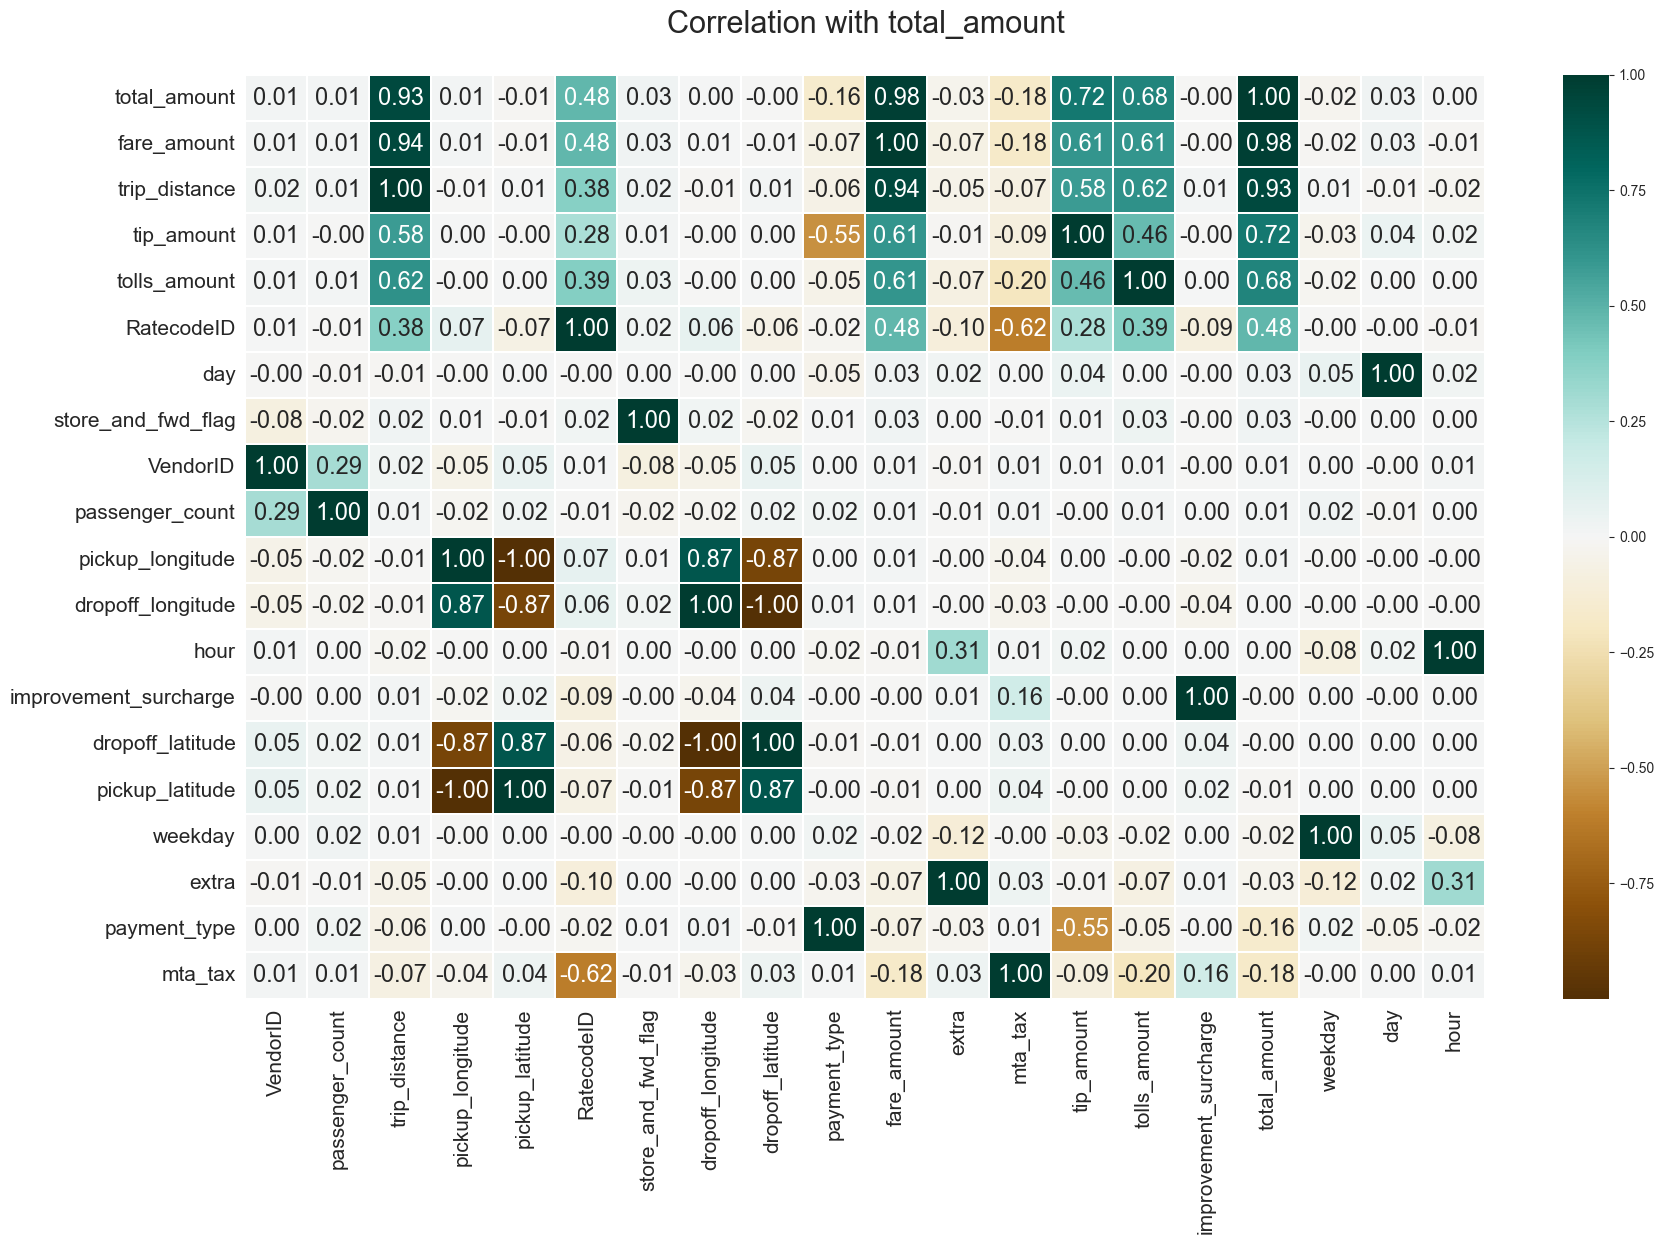

In [79]:
# correlation between variables
corr = data_b.corr().sort_values(by='total_amount', ascending=False)

# plot it
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(corr, annot = True, cmap ='BrBG', ax = ax, fmt='.2f', linewidths = 0.05, annot_kws = {'size': 17})
ax.tick_params(labelsize = 15)
ax.set_title('Correlation with total_amount\n', fontsize = 22)
plt.show()

We see strong positive correlations between `total_amount` and `trip_distance`, `fare_amount`, `tip_amount` and `tolls_amount`. And it looks logical.

Therefore, I will use a __linear regression model__ trying to find the most __features__ that explain our __target__ variable and also their __contribution__ to its value.

In [80]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # metrics

Our target variable `y` is a `total_amount` column and our features `X` are all other numerical preprocessed variables from `data_b`.

In [81]:
X = data_b.drop('total_amount', axis=1)
y = data_b['total_amount']

Now, let's split sequentially our dataset to `train` and `test` sets for further training and testing the regression model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Train the __Linear Regression__ model with default properties

In [83]:
lin_reg = LinearRegression()

# training the model
lin_reg.fit(X_train, y_train)

LinearRegression()

Now use the trained model to predict `total_amount` based on the features from the `test` part of our dataset. 

In [84]:
# Make prediction
y_pred = lin_reg.predict(X_test)

### Model Evluation - checking the model accuracy

Now we have 20% of our dataset with initial values of `total_amount` - __y_test__ and predicted - __y_pred__.

We'll compare them using statistical metrics.

So, in order to assess the accuracy of the model, I'll use the following metrics:
- MSE - mean_squared_error 
- RMSE - Root-mean-square deviation
- R2 - coefficient of determination
- MAE - mean_absolute_error

In [85]:
# for RMSE we need a small function
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [86]:
# calculating and printing the metrics
print('The lowest the better:\n')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print()
print('The closest to 1 the better:\n')
print(f'R2 score: {r2_score(y_test, y_pred)}')



The lowest the better:

MSE: 0.00011284654974338644
RMSE: 0.010622925667789756
MAE: 7.775121877510637e-05

The closest to 1 the better:

R2 score: 0.9999992264251094


### Find regression coefficients and make an equation

In [87]:
#display intercept, regression coefficients and R-squared value of model
print(f'Intercept: {lin_reg.intercept_}', f'Coefficients: {lin_reg.coef_}', f'Score: {lin_reg.score(X, y)}', sep='\n\n')

Intercept: -0.018414604110652988

Coefficients: [-1.74855085e-05  1.38065077e-06 -8.36300300e-05 -1.20375749e-05
 -2.07685216e-05 -7.00851006e-05  2.19626915e-05  7.58173577e-05
  1.36813565e-04 -2.43817909e-05  1.00003145e+00  1.00003036e+00
  1.00130611e+00  1.00000017e+00  9.99980461e-01  1.05911905e+00
  6.84015799e-06 -1.50443511e-06 -9.63564164e-07]

Score: 0.9999996199789792


In [88]:
print(f'We can see that the R2 value of the model is {lin_reg.score(X, y)}')

We can see that the R2 value of the model is 0.9999996199789792


This means that 99.99% of the variation of the `total_amount` variable can be explained by our variables in the model.

Now, I show the `features` and their `coefficients` to make a final `equation`

In [89]:
coefs = ['{:f}'.format(item) for item in lin_reg.coef_]

In [90]:
pd.DataFrame(data=coefs, index=X_train.columns)

,0
VendorID,-0.000017
passenger_count,0.000001
trip_distance,-0.000084
pickup_longitude,-0.000012
pickup_latitude,-0.000021
RatecodeID,-0.000070
store_and_fwd_flag,0.000022
dropoff_longitude,0.000076
dropoff_latitude,0.000137
payment_type,-0.000024


#### Regression Equation

It looks like the `accuracy` of our `trained model` is good enough, so we use it to `predict` the `total amount` paid on a trip for the trip records shown in `New Sample` file

In [91]:
# loading new_sample dataset
new_sample = pd.read_csv(r"C:\Users\pep\Documents\statistical_analysis_tools\Assessment2\Assessment 2 dataset\dataset\New Sample.csv")
new_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,2,2/25/2016 17:24,2/25/2016 17:27,2,0.70,-73.947250,40.763771,1,N,-73.992012,40.735390,2,5.0,0.0,0.5,0.0,0.0,0.3
1,2,2/25/2016 23:10,2/25/2016 23:31,2,5.52,-73.983017,40.750992,1,N,-73.988586,40.758839,2,20.0,0.5,0.5,0.0,0.0,0.3
2,2,2/1/2016 0:00,2/1/2016 0:10,6,1.99,-73.992340,40.758202,1,N,-73.964355,40.757977,1,9.5,0.5,0.5,0.7,0.0,0.3
3,1,2/1/2016 0:00,2/1/2016 0:05,1,1.50,-73.981453,40.749722,1,N,-73.982323,40.763985,2,6.5,0.5,0.5,0.0,0.0,0.3
4,2,2/1/2016 0:00,2/1/2016 0:20,1,5.60,-74.000603,40.729755,1,N,-73.951324,40.669834,1,20.0,0.5,0.5,4.0,0.0,0.3


We need to `preprocess` the `New Sample` data first in the same way as we did it with the `trained dataset`

In [92]:
new_sample.tpep_pickup_datetime = pd.to_datetime(new_sample.tpep_pickup_datetime)
new_sample.store_and_fwd_flag = np.where(new_sample.store_and_fwd_flag == 'Y', 1, 0)
new_sample['weekday'] = new_sample['tpep_pickup_datetime'].dt.weekday
new_sample['day'] = new_sample['tpep_pickup_datetime'].dt.day
new_sample['hour'] = new_sample['tpep_pickup_datetime'].dt.hour
new_sample.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
new_sample.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,weekday,day,hour
0,2,2,0.70,-73.947250,40.763771,1,0,-73.992012,40.735390,2,5.0,0.0,0.5,0.0,0.0,0.3,3,25,17
1,2,2,5.52,-73.983017,40.750992,1,0,-73.988586,40.758839,2,20.0,0.5,0.5,0.0,0.0,0.3,3,25,23
2,2,6,1.99,-73.992340,40.758202,1,0,-73.964355,40.757977,1,9.5,0.5,0.5,0.7,0.0,0.3,0,1,0
3,1,1,1.50,-73.981453,40.749722,1,0,-73.982323,40.763985,2,6.5,0.5,0.5,0.0,0.0,0.3,0,1,0
4,2,1,5.60,-74.000603,40.729755,1,0,-73.951324,40.669834,1,20.0,0.5,0.5,4.0,0.0,0.3,0,1,0


Now run the `trained model` on the values to predict the `total_amount`

In [93]:
new_sample_total_amount = lin_reg.predict(new_sample)

In [94]:
predictions = pd.DataFrame(new_sample_total_amount, columns=['predicted_total_amount'])

Tabulating the predicted values in the order the records are arranged in the file

In [95]:
predictions

,predicted_total_amount
0,5.799895
1,21.299977
2,11.500012
3,7.799944
4,25.300023
5,17.299952
6,9.359952
7,7.799964
8,9.799941
9,17.299981


## 4: Discussion

We have trained a Linear Regression model with default properties and achieved outstanding results in predicting our target variable using the listed features. Despite the availability of many other regression models, we didn't need to explore them as our simple model produced a remarkable accuracy of 99.99% on the test dataset.

This model serves as a valuable tool for predicting the total amount of a taxi drive and determining which features contribute most significantly to the amount value.

Prior to modeling, we preprocessed the data, making some assumptions and allowances. We observed numerous incorrect values and mistakes in the data. For example, some trip distances were either null or unrealistically large. To rectify this, we could have calculated the distance between the pick-up and drop-off geo locations, but this is also not reliable due to numerous records containing zeros or identical values.

Ideally, we could have verified and corrected values in the datasets using some calculations to obtain more precise data. However, our model produced excellent results even without such refinements.

## 5: Conclusion

Based on the analysis of the taxi trip dataset, several key findings were uncovered. Firstly, the average demand for taxis varied across different days of the week. Specifically, Friday had the highest demand while Monday had the lowest demand. Secondly, the peak period for taxi operation was observed to be in the evening hours, particularly during rush hour times.

Additionally, it was found that the average revenue generated by the taxi business was slightly higher during weekdays compared to weekends.

After preprocessing and cleaning the data, a linear regression model was created to predict the total amount paid for a taxi trip, given trip information such as time, distance, fees, and fares. The model was trained on 80% of the data and tested on the remaining 20% to ensure its generalization abilities. The final model showed a good performance in predicting the total amount paid for a taxi trip, with a low RMSE (0.0106) and high R2 score (0.9999).

In conclusion, the analysis of the taxi trip dataset provided insights into the daily trends and peak periods for taxi operation, as well as the factors affecting the total amount paid for a trip. The developed regression model could be used to predict the total amount paid for a taxi trip, helping the taxi business to optimize their pricing strategies and increase revenue.

## 6: Reference

__Data:__ The dataset was sourced from the NYC Taxi & Limousine Commission (TLC) official website. 

The dataset contains several explanatory variables used to assess a completed trip such as pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. 

A subsample of the original data is provided to use for the tasks itemised in the task sections. The trip records are divided into two files Main Sample and New Sample, respectively.